## Feature Importances from Baseline Linear Regression Model

In [1]:
from sklearn.feature_selection import RFECV
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, mean_squared_error, mean_absolute_error
from sklearn.model_selection import KFold, train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from Utils import *
from sklearn.model_selection import cross_val_score
matplotlib.style.use('ggplot')

%matplotlib inline

In [2]:
train = np.load('../Models/train.npy') # we only want to work with the training data
X = train[0:,0:-1]
y = train[:, -1]

X_train = np.load("../Models/X_train.npy")
X_test = np.load("../Models/X_test.npy")
y_train = np.load("../Models/y_train.npy")
y_test = np.load("../Models/y_test.npy")

In [8]:
rfe_cv_mae = RFECV(LinearRegression(), cv=10, scoring=mae_scorer_gs)
rfe_cv_rmse = RFECV(LinearRegression(), cv=10, scoring=rmse_scorer_gs)

rfe_cv_mae.fit(X, y)
rfe_cv_rmse.fit(X, y)


print "AVG CV MAE: ", model_cross_validation(rfe_cv_mae, X=X, y=y, scoring_func=mae_scorer_cv, cv=10)
print "AVG CV RMSE: ", model_cross_validation(rfe_cv_rmse, X=X, y=y, scoring_func=rmse_scorer_cv, cv=10)

# rfe_cv_mae.fit(X_train, y_train)
# rfe_cv_rmse.fit(X_train, y_train)

# pred_mae = rfe_cv_mae.predict(X_test)
# pred_rmse = rfe_cv_rmse.predict(X_test)

# print "MAE: ", absolute_error(y_test, pred_mae)
# print "RMSE: ", root_mean_squared(y_test, pred_rmse)

AVG CV MAE:  3.61905486296
AVG CV RMSE:  4.66841116854


## Mutual Information of Features

In [24]:
from sklearn.feature_selection import mutual_info_regression, f_regression

In [13]:
df = pd.read_csv("../feature_engineered_dataset.csv")
feature_names = list(df.columns)[:-1]

In [25]:
mutual_info = mutual_info_regression(X, y)

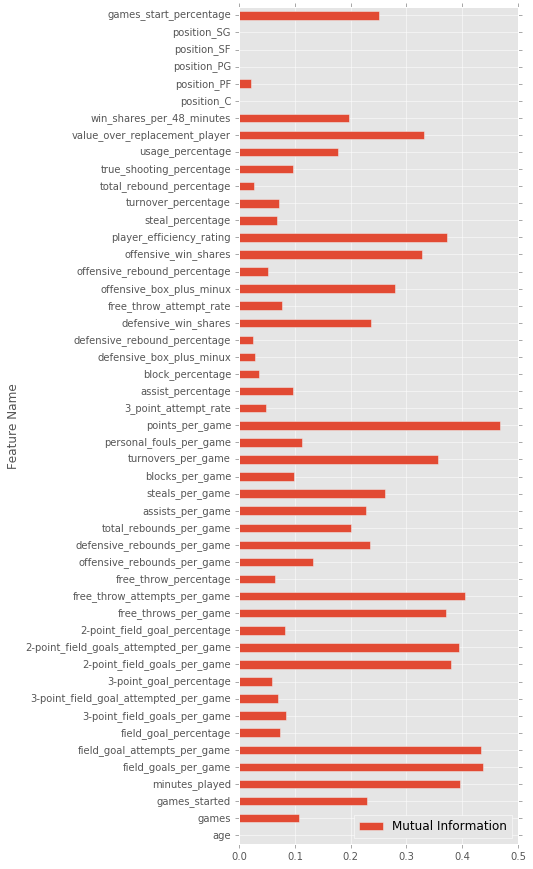

In [23]:
df_mutual_info = pd.DataFrame({
        'Feature Name': feature_names,
        'Mutual Information': mutual_info
    })

# df_mutual_info.to_csv("../features_mutual_info.csv", index=False)

df_mutual_info.plot.barh(x="Feature Name", y="Mutual Information", figsize=(5, 15))

In [34]:
one_row = df.head(1)

,age,games,games_started,minutes_played,field_goals_per_game,field_goal_attempts_per_game,field_goal_percentage,3-point_field_goals_per_game,3-point_field_goal_attempted_per_game,3-point_goal_percentage,...,usage_percentage,value_over_replacement_player,win_shares_per_48_minutes,position_C,position_PF,position_PG,position_SF,position_SG,games_start_percentage,rating
0,27,4,0,6.0,0.0,0.5,0.0,0.0,0.0,0.0,...,10.2,0.0,-0.128,0.0,0.0,0.0,0.0,1.0,0.0,65
